In [1]:
from os import path
import pandas as pd
import numpy as np

### Predictia evolutiei starii pandemiei de Covid19 
Se incearca rezolvarea problemei predictiei (Forecasting) a evolutiei numarului de cazuri de la o zi la alta pe o anumita perioada de timp. In urma predictiilor se va prezice daca pandemia se va termina repede/lent si daca se va termina curand in lume sau intr-o anumita tara (gen Romania). 

In urmatoarele momente se va prezenta structura bazei de date (a dataset-ului/csv-ului) respectiv cea a datelor locale din punct de vedere statistic. Setul de date a fost descarcat de pe Kaggle de la aceasta adresa: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset.

Acesta contine mai multe fisiere, unul generalist si cinci dintre ele puse pe serii de timp. Se va folosii doar fisierul cu seriile de timp globale ale numarului de cazuri confirmate.

Campurile setului de date sunt: provincia (poate sa lipseasca), tara, coordonatele geografice (nu se vor folosii) si numarul de cazuri de la 22 Ian 2020 pana la 6 Dec 2020 (la momentul actual).

### Incarcare set de date si afisarea unor date statistice ale setului de date

In [2]:
locatie = path.join(path.curdir, 'kaggle', 'covid19', 'input')
locatie_csv = path.join(locatie, 'time_series_covid_19_confirmed.csv')

### Se afiseaza setul de date complet
S-a renuntat la coordonatele geografice si s-a indexat dupa provincie si tara.
Provincia care nu este mentionata (camp null) a fost inlocuit cu 'Unknown' si s-au afisat primele 8 tari.

In [3]:
time_series_csv = pd.read_csv(locatie_csv, na_values=['?', 'na', 'nan', 'NaN'])
time_series_csv['Province/State'] = time_series_csv['Province/State'].fillna('Unknown')
time_series_csv.set_index(['Province/State', 'Country/Region'], drop=True, inplace=True)
time_series_csv.drop(labels=['Lat', 'Long'], axis=1, inplace=True)
time_series_csv.head(8)

1/22/20  1/23/20  1/24/20  1/25/20  \
Province/State Country/Region                                            
Unknown        Afghanistan                0        0        0        0   
               Albania                    0        0        0        0   
               Algeria                    0        0        0        0   
               Andorra                    0        0        0        0   
               Angola                     0        0        0        0   
               Antigua and Barbuda        0        0        0        0   
               Argentina                  0        0        0        0   
               Armenia                    0        0        0        0   

                                    1/26/20  1/27/20  1/28/20  1/29/20  \
Province/State Country/Region                                            
Unknown        Afghanistan                0        0        0        0   
               Albania                    0        0        0        0   
               Algeria                    0        0        0        0   
               Andorra                    0        0        0        0   
               Angola                     0        0        0        0   
               Antigua and Barbuda        0        0        0        0   
               Argentina                  0        0        0        0   
               Armenia                    0        0        0        0   

                                    1/30/20  1/31/20  ...  11/27/20  11/28/20  \
Province/State Country/Region                         ...                       
Unknown        Afghanistan                0        0  ...     45723     45844   
               Albania                    0        0  ...     36245     36790   
               Algeria                    0        0  ...     80168     81212   
               Andorra                    0        0  ...      6610      6610   
               Angola                     0        0  ...     15008     15087   
               Antigua and Barbuda        0        0  ...       141       141   
               Argentina                  0        0  ...   1407277   1413375   
               Armenia                    0        0  ...    132346    133594   

                                    11/29/20  11/30/20  12/1/20  12/2/20  \
Province/State Country/Region                                              
Unknown        Afghanistan             46116     46274    46516    46718   
               Albania                 37625     38182    39014    39719   
               Algeria                 82221     83199    84152    85084   
               Andorra                  6712      6745     6790     6842   
               Angola                  15103     15139    15251    15319   
               Antigua and Barbuda       141       141      142      144   
               Argentina             1418807   1424533  1432570  1440103   
               Armenia                134768    135124   135967   137231   

                                    12/3/20  12/4/20  12/5/20  12/6/20  
Province/State Country/Region                                           
Unknown        Afghanistan            46837    46837    47072    47306  
               Albania                40501    41302    42148    42988  
               Algeria                85927    86730    87502    88252  
               Andorra                 6904     6955     7005     7050  
               Angola                 15361    15493    15536    15591  
               Antigua and Barbuda      144      144      144      144  
               Argentina            1447732  1454631  1459832  1463110  
               Armenia               138508   139692   140959   141937  

[8 rows x 320 columns]

### Intervalele valorilor numerice din setul de date (se afiseaza)
- cate date se cunosc in Romania (aprox 300 de zile)
- media statistica a intregului set de date (in medie 85000 de cazuri sunt confirmate in raport cu perioada)
- abaterea standard de la medie a datelor (in caz de exista o distributie normala a datelor)
- valoarea minima (este 0 deoarece datele sunt corecte si nu pot exista minus numar de cazuri)
- valoarea maxima (este ~500000 de cazuri sunt confirmate la ora actuala in total)

De mentionat: Datele din set sunt in timp, un numar reprezinta numarul de cazuri total in ziua respectiva

In [4]:
romania = time_series_csv.loc[('Unknown', 'Romania'),]
romania.index = pd.to_datetime(romania.index)

In [5]:
romania.describe()

count       320.000000
mean      85229.384375
std      123010.469569
min           0.000000
25%        5859.250000
50%       26776.000000
75%      109071.750000
max      513576.000000
Name: (Unknown, Romania), dtype: float64

## Evolutia numarului total de cazuri in Romania
** Graficul de mai jos prezinta evolutia in timp, continua, a numarului total de cazuri din Romania **

!pip install plotly
!pip install psutil
!conda install -y -c plotly plotly-orca

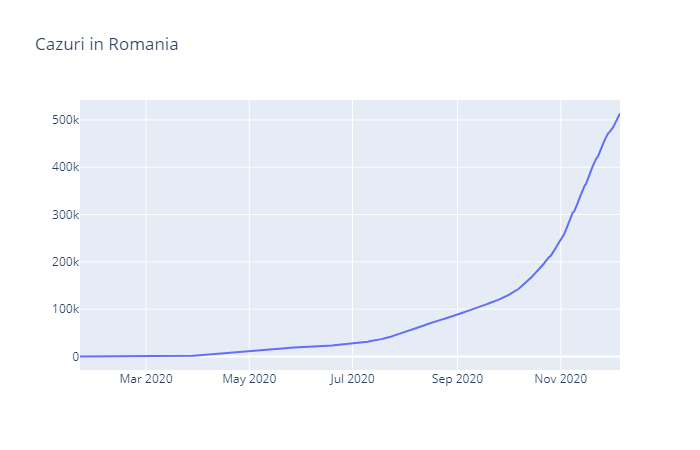

In [6]:
from plotly.graph_objs import Scatter, Figure
import plotly.io as pio
pio.renderers.default = 'png'
splot = Figure()
splot.add_trace(Scatter(x=romania.index, y=romania, name='confirmate'))
splot.update_layout(title='Cazuri in Romania')
splot.show()

** Evolutia numarului de cazuri raportat la zile la 1000 de loc in Romania **

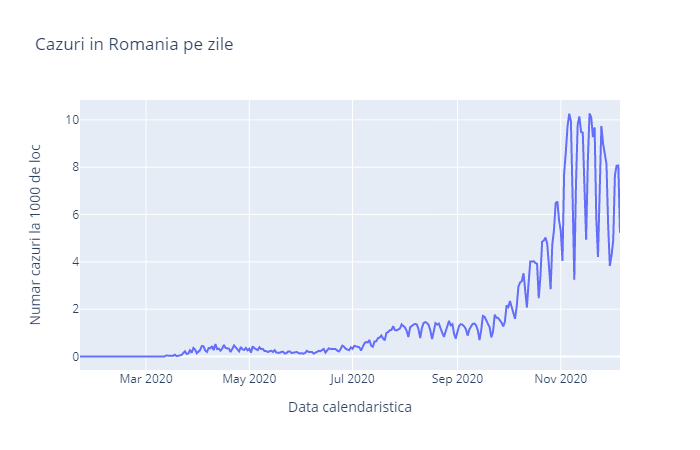

In [7]:
romania = romania.diff().fillna(romania[0])/1000
splot = Figure()
splot.add_trace(Scatter(x=romania.index, y=romania, name='confirmate'))
splot.update_layout(xaxis_title='Data calendaristica', yaxis_title='Numar cazuri la 1000 de loc', title='Cazuri in Romania pe zile')
splot.show()

### Variabile depedente si independente ale setului de date
* Fiecare zi in parte depinde de cele din trecut. In functie de precizia de predictie numarul de variabile indepedente de care depinde numarul de cazuri in ziua d variaza intre 1 zi si 320 de zile (sau numarul total de zile pentru care cunosc date)

* Daca marimea ferestrei (numarul de variabile indepedente) este prea mare atunci predictia nu mai este perfecta, modelul AI invata mai putin si prost.
Acest numar de variabile trebuie sa fie mic, dar nici prea mic deoarece nu are destule informatii pentru o noua predictie

* Variabila depedenta este variabila care vreau sa o prezic (numarul de cazuri viitoare in ziua d raportate la cele dinainte)

In [8]:
!pip install statsmodels

### Se va incerca prezicerea datelor folosind modelul statistic ARIMA (Autoregressive Moving Avarage).
ARIMA este un model de prezicere statistic, adesea folosit pe serii de timp financiare (care prezinta evolutia in timp a valorii unei monede, gen Euro in raport cu alta, gen RON). ARIMA vine de la Autoregressive Integrated Moving Avarage.

Modelul autoregressive AR(1) este definit matematic ca fiind suma ponderata a zilelor precedente de care depinde functional ziua curenta.
* Formula matematica AR(n) => $y_t = c + \sum_{i=1}^{n} {\beta_i*y_{t-i}} + \epsilon_t$, unde n este numarul de variabile de care depinde $y_t$, $\epsilon_t$ sunt factorii aleatorii (white noise), si $\beta_i$ sunt parametrii modelului

Modelul moving avarage MA(1) este definit matematic ca fiind media aritmetica dintre momentele de timp anterioare, 1 este lungimea ferestrei in functie de care se calculeaza mediile
* Formula matematica MA(n) => $avg(y_t) = c + \frac{1}{n} * \sum_{i=1}^{n} \theta_i*y_{t-i}$ unde n este numarul de zile pe care se calculeaza media, $y_{t-i}$ sunt valorile din zilele precedente, c este o constanta si $\theta_i$ sunt parametrii modelului

Modelul integrated I(1) este acea parte din ARIMA care se ocupa cu reducerea seriei la una stationara, parametrii statistici raman constanti in timp, partea sezoniera si de trend fiind eliminate
* Formula matematica I(n) => $y_t = y_t - y_{t-n}$ unde n este lungimea intervalului asupra caruia i se aplica integrarea (nu are legatura cu integralele din analiza ci mai mult o derivata a functiei $y(t)$)

Formula ARMA(p,q) de prezicere a lui $y_t$ in final este $y_t = \sum_{i=1}^{p} {\beta_i*y_{t-i}} + \frac{1}{q} * \sum_{i=1}^{q} {\theta_i*y_{t-i}} + \epsilon_t + c$

Testul statistic pentru a stabili o serie de timp daca este stationara este cea a lui Dickey-Fuller care spune ca daca: 
* Media aritmetica este constanta in timp
* Abaterea standard este constanta in timp
* Seria nu variaza ciclic sau sezonier

Atunci seria de timp este stationara

Testul calculeaza un parametru p care daca este mai mare ca 0.05 premisa cum ca seria este stationara este invalidata altfel aceasta este validata, deci seria este stationara.

In [9]:
def MA(data, nrZile):
    ma = []
    for i in range(0, len(data)-nrZile, 1):
        ma.append(np.mean(data[i:i+nrZile].values))
    return ma
ma_romania = pd.Series(MA(romania, 7))

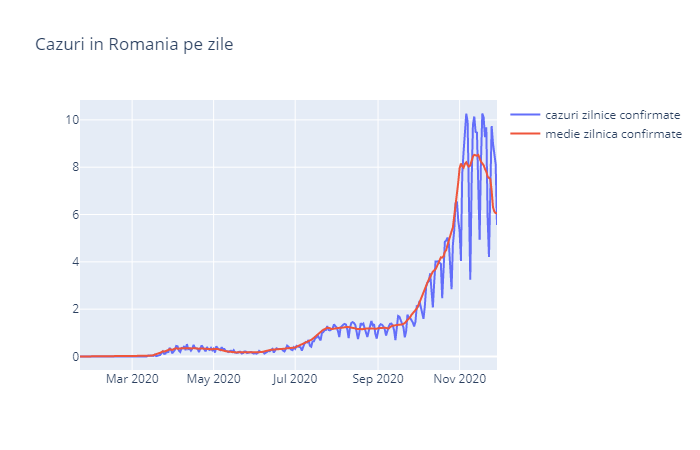

In [10]:
splot = Figure()
splot.add_trace(Scatter(x=romania.index, y=romania.values[:-7], name='cazuri zilnice confirmate'))
splot.add_trace(Scatter(x=romania.index, y=ma_romania.values, name='medie zilnica confirmate'))
splot.update_layout(title='Cazuri in Romania pe zile', showlegend=True)
splot.show()

## Comparatii intre metodele de prezicere existente
In continuare se vor prezenta 3 metode de prezicere a unei serii. O metoda implementata folosind RNA si Keras, una folosind modelul statistic ARIMA (din statsmodels) si una implementata de cei de la Facebook (Prophet)

Se vor determina si compara valorile fiecarui loss calculate folosind Rooted_Mean_Squared_Error a carei formule matematice este: 
- $loss = \sqrt{\frac{1}{n}{\sum_{i=1}^{n} {(\hat{y}_i - {y}_i)^2}}}$
- modelul cel mai sigur este cel al carui RMSE este cel mai mic
- datele cunsocute sunt date foarte volatile, deci prezicerile nu vor putea fi cele mai sigure

In [11]:
date = {'Denumire':[],'NrStraturi':[],'NrNeuroni_1':[],'NrNeuroni_2':[],'NrNeuroni_3':[],'ARIMA_P':[],'ARIMA_Q':[],'Loss':[], 'MovingWindowLoss':[]}

In [12]:
from tensorflow.keras.losses import mean_squared_error
from kaggle.covid19 import Covid19ANN, Covid19ARIMA
covid19 = Covid19ANN()
covid19.select('Unknown', 'Romania').build(window=7, predictions=56, dropout=0.2, layers=[256], verbose=0)
covid19.train(epochs=10, verbose=0)
redresat, prezis, asteptat = covid19.test(window=7, predictions=56)

(313, 1, 7) (313, 1)
---------------------------------------------------------------
Scor pe setul de testare (RMSE): 0.1659686134196319
Testare cu fereastra deplasabila
---------------------------------------------------------------
Scor pe setul de testare (RMSE): 0.30165746808052063


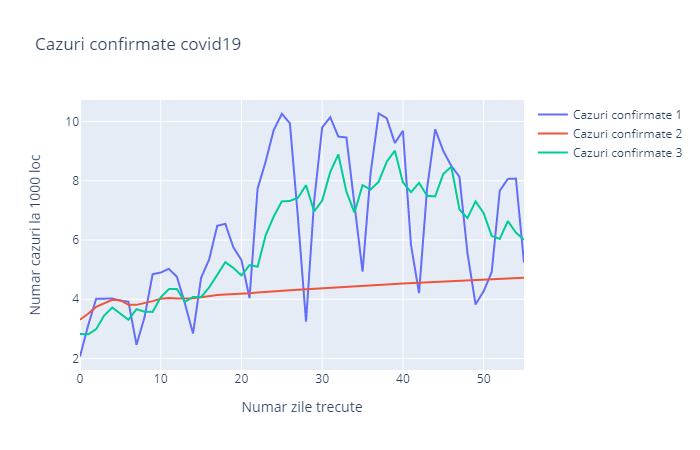

In [13]:
covid19.plot(serieses=[asteptat, prezis, redresat])

In [14]:
date['Denumire'].append('Retea Artificiala 1')
date['NrStraturi'].append(1)
date['NrNeuroni_1'].append(256)
date['NrNeuroni_2'].append('NaN')
date['NrNeuroni_3'].append('NaN')
date['ARIMA_P'].append(7)
date['ARIMA_Q'].append('NaN')
date['Loss'].append('%.5f' % np.sqrt(mean_squared_error(redresat, asteptat)))
date['MovingWindowLoss'].append('%.5f' % np.sqrt(mean_squared_error(prezis, asteptat)))

In [15]:
covid19 = Covid19ANN()
covid19.select('Unknown', 'Romania').build(window=7, predictions=56, dropout=0.2, layers=[128, 32], verbose=0)
covid19.train(epochs=10, verbose=0)
redresat, prezis, asteptat = covid19.test(window=7, predictions=56)

(313, 1, 7) (313, 1)
---------------------------------------------------------------
Scor pe setul de testare (RMSE): 0.136044720863225
Testare cu fereastra deplasabila
---------------------------------------------------------------
Scor pe setul de testare (RMSE): 0.2375812977552414


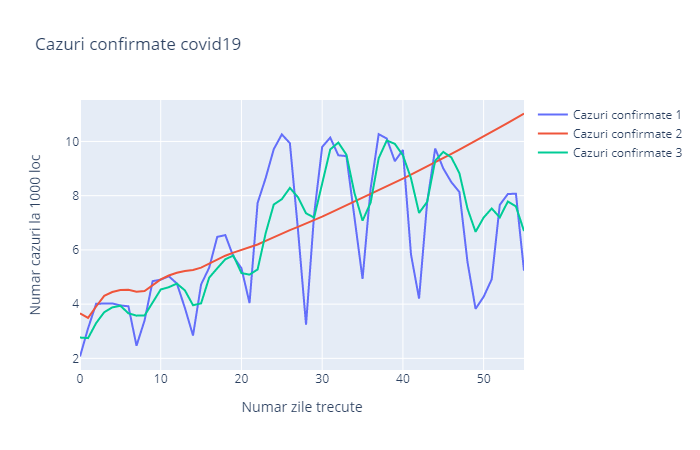

In [16]:
covid19.plot(serieses=[asteptat, prezis, redresat])

In [17]:
date['Denumire'].append('Retea Artificiala 2')
date['NrStraturi'].append(1)
date['NrNeuroni_1'].append(128)
date['NrNeuroni_2'].append(32)
date['NrNeuroni_3'].append('NaN')
date['ARIMA_P'].append(7)
date['ARIMA_Q'].append('NaN')
date['Loss'].append('%.5f' % np.sqrt(mean_squared_error(redresat, asteptat)))
date['MovingWindowLoss'].append('%.5f' % np.sqrt(mean_squared_error(prezis, asteptat)))

In [18]:
covid19 = Covid19ANN()
covid19.select('Unknown', 'Romania').build(window=7, predictions=56, dropout=0.2, layers=[128, 32, 16], verbose=0)
covid19.train(epochs=10, verbose=0)
redresat, prezis, asteptat = covid19.test(window=7, predictions=56)

(313, 1, 7) (313, 1)
---------------------------------------------------------------
Scor pe setul de testare (RMSE): 0.16875167731051965
Testare cu fereastra deplasabila
---------------------------------------------------------------
Scor pe setul de testare (RMSE): 0.474637895822525


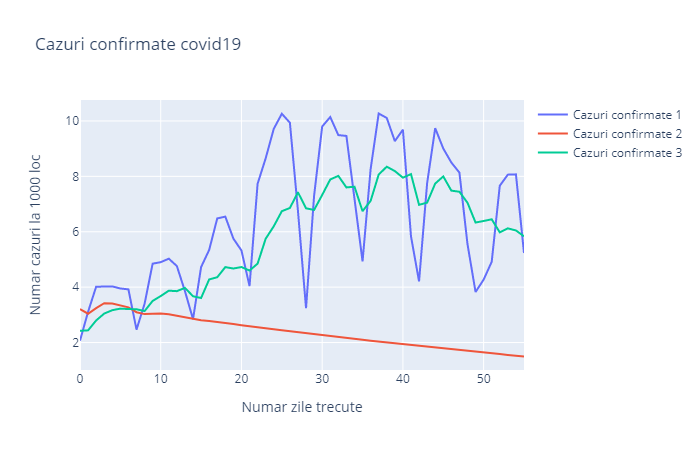

In [19]:
covid19.plot(serieses=[asteptat, prezis, redresat])

In [20]:
date['Denumire'].append('Retea Artificiala 3')
date['NrStraturi'].append(1)
date['NrNeuroni_1'].append(128)
date['NrNeuroni_2'].append(32)
date['NrNeuroni_3'].append(16)
date['ARIMA_P'].append(7)
date['ARIMA_Q'].append('NaN')
date['Loss'].append('%.5f' % np.sqrt(mean_squared_error(redresat, asteptat)))
date['MovingWindowLoss'].append('%.5f' % np.sqrt(mean_squared_error(prezis, asteptat)))

In [21]:
covid19 = Covid19ARIMA()
covid19.select('Unknown', 'Romania').fit(ar=3, ma=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     ('Unknown', 'Romania')   No. Observations:                  292
Model:                     ARIMA(3, 1, 4)   Log Likelihood                 -75.650
Date:                    Wed, 27 Jan 2021   AIC                            167.301
Time:                            12:26:07   BIC                            196.687
Sample:                        01-22-2020   HQIC                           179.073
                             - 11-08-2020                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4289      0.215      1.992      0.046       0.007       0.851
ar.L2          0.0045      0.288      0.016      0.987      -0.559       0.568
ar.L3         -0.8051      0.225     -3.574      0.000      -1.247      -0.364
ma.L1         -0.6185      0.214     -2.887      0.004      -1.038      -0.199
ma.L2          0.1023      0.305      0.335      0.737      -0.495       0.700
ma.L3          0.7665      0.277      2.772      0.006       0.224       1.308
ma.L4         -0.4146      0.081     -5.149      0.000      -0.572      -0.257
sigma2         0.0958      0.003     29.605      0.000       0.089       0.102
===================================================================================
Ljung-Box (L1) (Q):                   1.87   Jarque-Bera (JB):             25596.16
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):              35.20   Skew:                             4.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        48.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
[history, forecast] = covid19.predict(testing=True)

Scor model (RMSE): 1.608869159501195


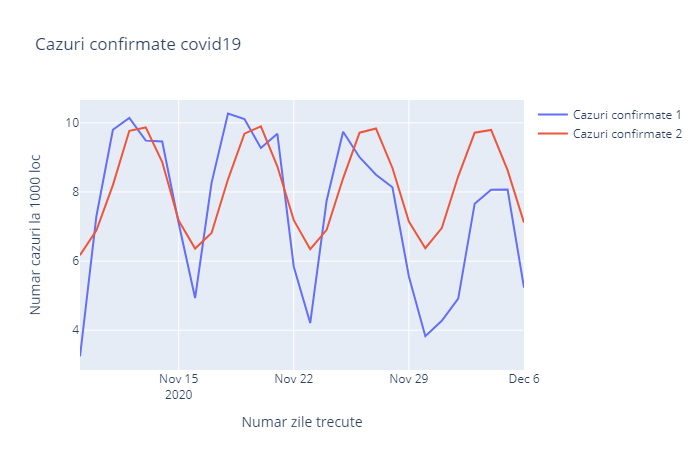

In [23]:
covid19.plot(serieses=[history, forecast])

In [24]:
date['Denumire'].append('Model ARIMA')
date['NrStraturi'].append('NaN')
date['NrNeuroni_1'].append('NaN')
date['NrNeuroni_2'].append('NaN')
date['NrNeuroni_3'].append('NaN')
date['ARIMA_P'].append(3)
date['ARIMA_Q'].append(4)
date['Loss'].append('%.5f' % np.sqrt(mean_squared_error(forecast, history)))
date['MovingWindowLoss'].append('NaN')

In [25]:
import plotly.graph_objs as go
def plot(data):
    splot = go.Figure()
    splot.add_trace(go.Scatter(x=data.index, y=data.values, name='Cazuri confirmate'))
    splot.update_layout(xaxis_title='Zile', yaxis_title='Nr cazuri', title='Cazuri confirmate zilnice la 1000 loc')
    splot.show()

!conda install -y -c conda-forge fbprophet

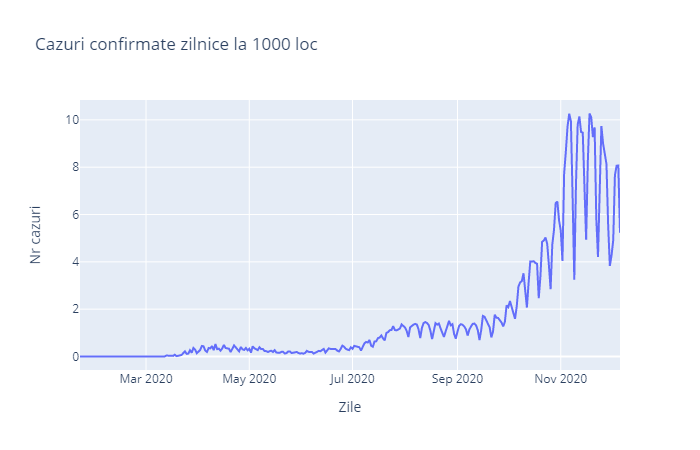

In [26]:
from fbprophet import Prophet
plot(romania)
romania = pd.DataFrame({'ds': pd.to_datetime(romania.index), 'y': romania.values}, columns=['ds', 'y'])

In [27]:
model = Prophet(daily_seasonality=False, yearly_seasonality=False)
nrTotal = len(romania['ds'])
test = romania.loc[nrTotal-28:,]
train = romania.loc[:nrTotal-28,]
model.fit(train)
future = model.make_future_dataframe(periods=27)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
loss = np.sqrt(mean_squared_error(romania['y'], forecast['yhat']))
print(f'Scor predictie (RMSE): {loss}')

Scor predictie (RMSE): 0.8963779230583288


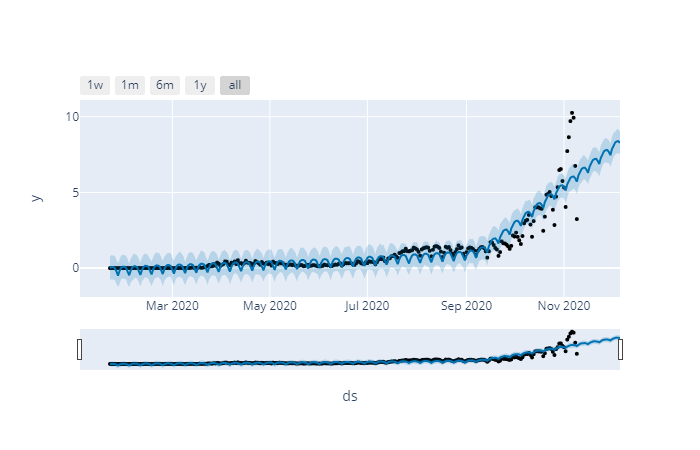

In [28]:
from fbprophet.plot import plot_plotly
plot_plotly(model, forecast)

In [29]:
date['Denumire'].append('Model Facebook Prophet')
date['NrStraturi'].append('NaN')
date['NrNeuroni_1'].append('NaN')
date['NrNeuroni_2'].append('NaN')
date['NrNeuroni_3'].append('NaN')
date['ARIMA_P'].append('NaN')
date['ARIMA_Q'].append('NaN')
date['Loss'].append('%.5f' % np.sqrt(mean_squared_error(romania['y'], forecast['yhat'])))
date['MovingWindowLoss'].append('NaN')

In [30]:
pd.DataFrame(date)

,Denumire,NrStraturi,NrNeuroni_1,NrNeuroni_2,NrNeuroni_3,ARIMA_P,ARIMA_Q,Loss,MovingWindowLoss
0,Retea Artificiala 1,1,256,NaN,NaN,7,NaN,1.70433,3.09772
1,Retea Artificiala 2,1,128,32,NaN,7,NaN,1.39704,2.43972
2,Retea Artificiala 3,1,128,32,16,7,NaN,1.73291,4.87406
3,Model ARIMA,NaN,NaN,NaN,NaN,3,4,1.60887,NaN
4,Model Facebook Prophet,NaN,NaN,NaN,NaN,NaN,NaN,0.89638,NaN
